# Arima

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:              SARIMAX(15, 0, 3)   Log Likelihood               -1253.574
Date:                Thu, 30 Nov 2023   AIC                           2545.148
Time:                        20:56:24   BIC                           2638.395
Sample:                             0   HQIC                          2580.588
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6703     32.556      0.051      0.959     -62.138      65.479
ar.L2         -0.9042     21.665     -0.042      0.967     -43.367      41.558
ar.L3         -0.3847     16.687     -0.023      0.9

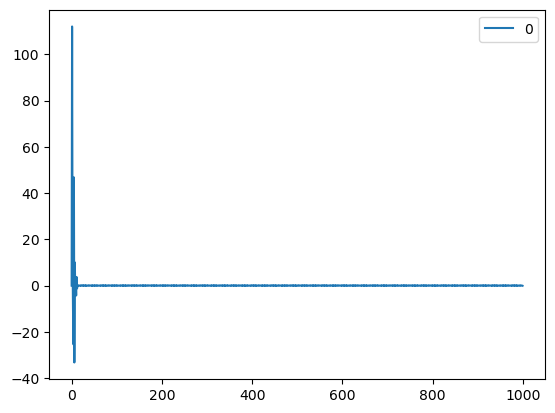

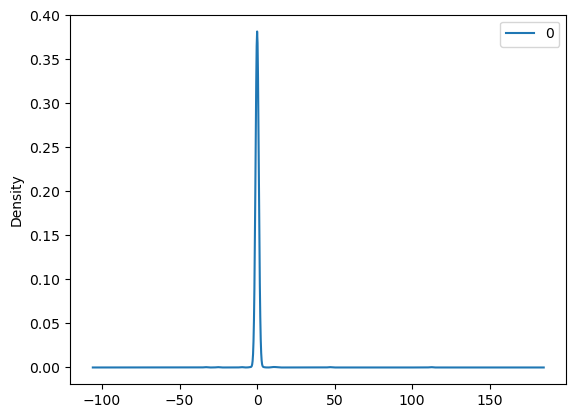

                 0
count  1000.000000
mean      0.109970
std       4.110423
min     -33.267092
25%      -0.058928
50%       0.006372
75%       0.046841
max     112.097744


array([ 125.75466455, -125.32343226,   39.42304073,    9.32304742,
         56.36903548, -178.08957565,  229.6638464 , -164.05207819,
         67.94314242,  -60.50221041])

In [48]:
import numpy   as np
import pandas  as pd

import seaborn as sns
import matplotlib.pyplot as plt

from   statsmodels.tsa.arima.model         import  ARIMA                # ARIMA
from   statsmodels.tsa.statespace.sarimax  import SARIMAX               # Seasonal ARIMA

from   statsmodels.tsa.holtwinters         import ExponentialSmoothing  # Exponential Smoothing
from   statsmodels.tsa.vector_ar.var_model import VAR                   # Vector Autoregression

# Fibonacci series
Serie = [ 100*np.sin(2*x)+150*np.sin(3*x) for x in range(1000)]
    
# Split the series into training and prediction data
train   = Serie

# ARIMA 
arima = ARIMA(
    endog                  =  train,
    order                  = (3,0,3),
    seasonal_order         = (0, 0, 0, 0),
    trend_offset           =  1,
    trend                  =  None,
    exog                   =  None,
    dates                  =  None,
    freq                   =  None,
    enforce_stationarity   =  True,
    enforce_invertibility  =  True,
    validate_specification =  True,
    concentrate_scale      =  False,
    missing                = 'none'
)

# SARIMAX
sarimax = SARIMAX(
    endog                  =  train,
    order                  = (15,0,3),
    seasonal_order         = (0, 0, 0, 0),
    trend_offset           =  1,
    trend                  =  None,
    exog                   =  None,
    dates                  =  None,
    freq                   =  None,
    enforce_stationarity   =  True,
    enforce_invertibility  =  True,
    validate_specification =  True,
    concentrate_scale      =  False,
    missing                = 'none'
)

# ExponentialSmoothing
ExS = ExponentialSmoothing(
    endog                  =  train,
    trend                  =  None,
    seasonal               =  None, 
    seasonal_periods       =  None,
    initial_level          =  None,
    initial_trend          =  None,
    initial_seasonal       =  None,
    bounds                 =  None,
    dates                  =  None,
    freq                   =  None,
    damped_trend           =  False,
    use_boxcox             =  False,
    initialization_method  = 'estimated',
    missing                = 'none'
)

# fitted model
model = sarimax.fit()

# summary of fit model
print(model.summary())

# line plot of residuals
residuals = pd.DataFrame(model.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()

# summary stats of residuals
print(residuals.describe())

# forecasting 
model.forecast(steps=10) 

# Forcasting Future n Steps 

In [49]:
# forcasting
n    =   50
PRED = model.forecast(steps=n)
TRUE = [ 100*np.sin(2*x)+150*np.sin(3*x) for x in range(1000,1000+n,1)]
RMSE = (np.sum((TRUE - PRED)**2)/n)**0.5
RMSE

0.15119780728861587

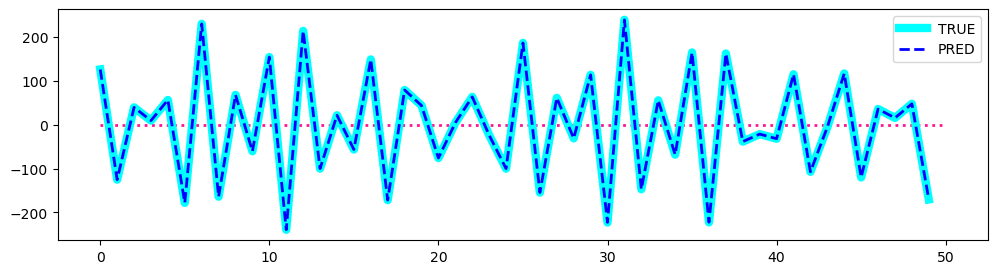

In [50]:
# visualizing
plt.figure( figsize=(12,3) )
plt.plot(  [0,n]   , [0,0] , ":"  ,                color='deeppink' ,linewidth=2 )
plt.plot( range(n) , TRUE  , "-"  , label="TRUE" , color='cyan'     ,linewidth=6 )
plt.plot( range(n) , PRED  , "--" , label="PRED" , color='blue'     ,linewidth=2 )
plt.legend(); plt.show()

#####   

#####   